In [1]:
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from fullyconnectednet import *
from trainer import Trainer
from data_utils import load_CIFAR10
from scipy import flip
import random
from sklearn.utils import shuffle


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:

# Load the raw CIFAR-10 data.
cifar10_dir = 'cifar-10-batches-py'
X_train, Y_train, X_test, Y_test = load_CIFAR10(cifar10_dir)

#flip the images as a sort of preprocessing
X_train_flipped= flip(X_train, 2)


X_train_total= np.concatenate((X_train, X_train_flipped), axis=0)
Y_train_total= np.concatenate((Y_train, Y_train), axis=0)
Y_train_total, X_train_total=shuffle(Y_train_total, X_train_total, random_state=0)

data= {}
data['X_train'] = X_train_total[2000:100000]
data['y_train'] = Y_train_total[2000:100000]
data['X_val'] = X_train_total[:2000]
data['y_val'] = Y_train_total[:2000]
data['X_test'] = X_test
data['y_test'] = Y_test

#get a small part of the data to be used to choose the best hyper parameters
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

In [4]:
# As a sanity check, we print out the size of the training and test data.
print ('Training data shape: ', X_train_total.shape)
print ('Training labels shape: ', Y_train_total.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)

Training data shape:  (100000, 32, 32, 3)
Training labels shape:  (100000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


for adam optimizer : 
(Iteration 1 / 400) loss: 9.161659
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Iteration 11 / 400) loss: 3.174016
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc: 0.081000
(Epoch 0 / 10) train acc: 0.089000; val_acc

(Epoch 3 / 10) train acc: 0.260000; val_acc: 0.260000
(Epoch 3 / 10) train acc: 0.260000; val_acc: 0.260000
(Iteration 151 / 400) loss: 1.983449
(Epoch 3 / 10) train acc: 0.260000; val_acc: 0.260000
(Epoch 3 / 10) train acc: 0.260000; val_acc: 0.260000
(Epoch 3 / 10) train acc: 0.260000; val_acc: 0.260000
(Epoch 3 / 10) train acc: 0.260000; val_acc: 0.260000
(Epoch 3 / 10) train acc: 0.260000; val_acc: 0.260000
(Epoch 3 / 10) train acc: 0.260000; val_acc: 0.260000
(Epoch 3 / 10) train acc: 0.260000; val_acc: 0.260000
(Epoch 3 / 10) train acc: 0.260000; val_acc: 0.260000
(Epoch 3 / 10) train acc: 0.260000; val_acc: 0.260000
(Iteration 161 / 400) loss: 2.058089
(Epoch 4 / 10) train acc: 0.286000; val_acc: 0.269000
(Epoch 4 / 10) train acc: 0.286000; val_acc: 0.269000
(Epoch 4 / 10) train acc: 0.286000; val_acc: 0.269000
(Epoch 4 / 10) train acc: 0.286000; val_acc: 0.269000
(Epoch 4 / 10) train acc: 0.286000; val_acc: 0.269000
(Epoch 4 / 10) train acc: 0.286000; val_acc: 0.269000
(Epoch 4

(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Iteration 311 / 400) loss: 1.740731
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.338000; val_acc: 0.307000
(Iteration 321 / 400) loss: 1.897549
(Epoch 8 / 10) train acc: 0.322000; val_acc: 0.278000
(Epoch 8

(Iteration 51 / 400) loss: 2.070014
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Iteration 61 / 400) loss: 2.166302
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 / 10) train acc: 0.176000; val_acc: 0.175500
(Epoch 1 /

(Epoch 4 / 10) train acc: 0.284000; val_acc: 0.239500
(Epoch 4 / 10) train acc: 0.284000; val_acc: 0.239500
(Epoch 4 / 10) train acc: 0.284000; val_acc: 0.239500
(Epoch 4 / 10) train acc: 0.284000; val_acc: 0.239500
(Iteration 201 / 400) loss: 2.012662
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Iteration 211 / 400) loss: 1.790008
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5 / 10) train acc: 0.311000; val_acc: 0.255000
(Epoch 5

(Iteration 351 / 400) loss: 1.829496
(Epoch 8 / 10) train acc: 0.321000; val_acc: 0.269500
(Epoch 8 / 10) train acc: 0.321000; val_acc: 0.269500
(Epoch 8 / 10) train acc: 0.321000; val_acc: 0.269500
(Epoch 8 / 10) train acc: 0.321000; val_acc: 0.269500
(Epoch 8 / 10) train acc: 0.321000; val_acc: 0.269500
(Epoch 8 / 10) train acc: 0.321000; val_acc: 0.269500
(Epoch 8 / 10) train acc: 0.321000; val_acc: 0.269500
(Epoch 8 / 10) train acc: 0.321000; val_acc: 0.269500
(Epoch 8 / 10) train acc: 0.321000; val_acc: 0.269500
(Iteration 361 / 400) loss: 1.648152
(Epoch 9 / 10) train acc: 0.349000; val_acc: 0.287500
(Epoch 9 / 10) train acc: 0.349000; val_acc: 0.287500
(Epoch 9 / 10) train acc: 0.349000; val_acc: 0.287500
(Epoch 9 / 10) train acc: 0.349000; val_acc: 0.287500
(Epoch 9 / 10) train acc: 0.349000; val_acc: 0.287500
(Epoch 9 / 10) train acc: 0.349000; val_acc: 0.287500
(Epoch 9 / 10) train acc: 0.349000; val_acc: 0.287500
(Epoch 9 / 10) train acc: 0.349000; val_acc: 0.287500
(Epoch 9

/Users/air/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


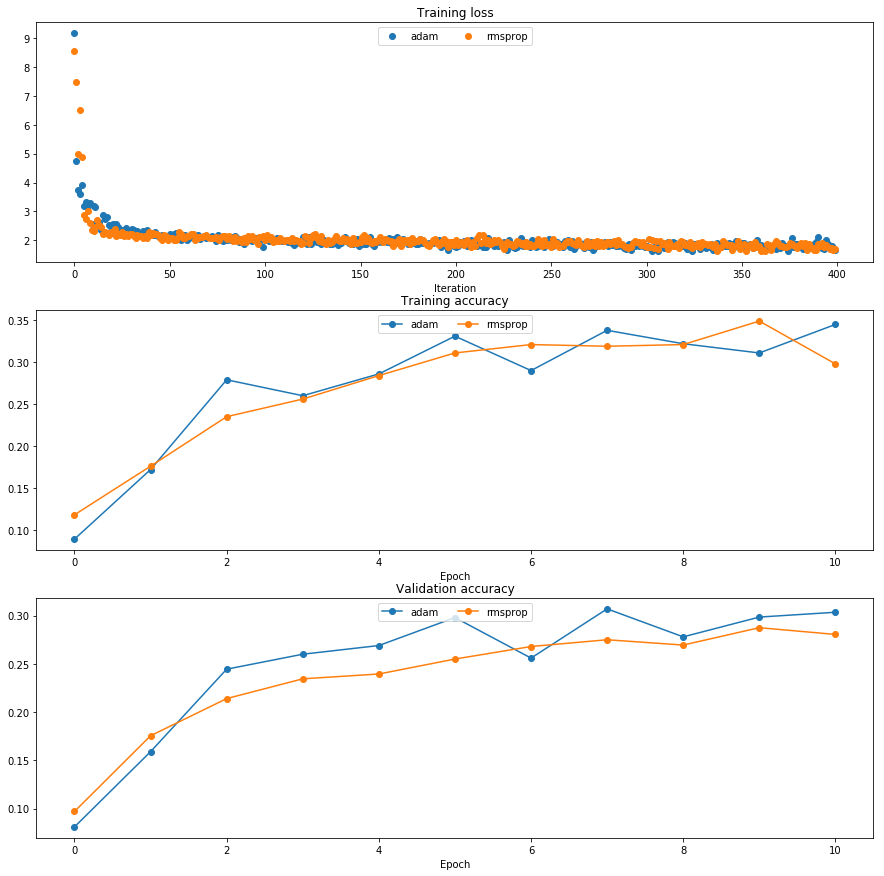

In [5]:
#finding the best GD optimizer model to be used
training_dict={}
layers=[85, 85, 80, 80]
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for gs in ['adam', 'rmsprop']:
    print("for %s optimizer : "% gs)
    model = FullyConnectedNet(layers, weight_scale=5e-2)

    training = Trainer(model, small_data,
                  num_epochs=10, batch_size=100,
                  update_rule=gs,
                  optim_config={
                    'learning_rate': learning_rates[gs]
                  },
                  verbose=True)
    training_dict[gs] = training
    training.train()
    

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for gs, training in training_dict.items():
  plt.subplot(3, 1, 1)
  plt.plot(training.loss_history, 'o', label=gs)
  
  plt.subplot(3, 1, 2)
  plt.plot(training.train_acc_history, '-o', label=gs)

  plt.subplot(3, 1, 3)
  plt.plot(training.val_acc_history, '-o', label=gs)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [6]:
#find the best learning rate for 
learning_rates = np.logspace(-4, -2.7, 8)
weight_scales = np.logspace(-2, -1.6, 4)
best_model = None
best_acc = -1
for learning_rate in learning_rates:
    for weight_scale in weight_scales:
        model = FullyConnectedNet(layers, weight_scale=weight_scale)

        training = Trainer(model, small_data,
                  num_epochs=10, batch_size=100,
                  update_rule='adam',
                  optim_config={
                    'learning_rate': learning_rate
                  },
                  verbose=False)
        training.train()
        if training.best_val_acc > best_acc:
            best_acc = training.best_val_acc
            best_model = model
            best_learning_rate, best_weight_scale = (learning_rate, weight_scale)
            print("best valid acc yet: %f   learning_rate: %e weight_scale: %e" % (best_acc, learning_rate, weight_scale))



best valid acc yet: 0.199500   learning_rate: 1.000000e-04 weight_scale: 1.000000e-02
best valid acc yet: 0.278500   learning_rate: 1.000000e-04 weight_scale: 1.359356e-02
best valid acc yet: 0.300000   learning_rate: 1.000000e-04 weight_scale: 1.847850e-02
best valid acc yet: 0.337500   learning_rate: 1.000000e-04 weight_scale: 2.511886e-02
best valid acc yet: 0.345000   learning_rate: 1.533608e-04 weight_scale: 2.511886e-02
best valid acc yet: 0.349000   learning_rate: 2.351953e-04 weight_scale: 2.511886e-02
best valid acc yet: 0.349500   learning_rate: 3.606973e-04 weight_scale: 2.511886e-02


In [7]:
#getting the best regularization factor 
regular = np.logspace(-2, 0, 8)
for reg in regular:
        print ('for regulraization factor %f  : ' % reg)
        model = FullyConnectedNet(layers,reg=reg, weight_scale=best_weight_scale)
        training = Trainer(model, small_data,
                  num_epochs=10, batch_size=100,
                  update_rule='adam',
                  optim_config={
                    'learning_rate': best_learning_rate
                  },
                  verbose=True)
        training.train()



for regulraization factor 0.010000  : 
(Iteration 1 / 400) loss: 3.201798
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Iteration 11 / 400) loss: 3.005573
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 0.097000; val_acc: 0.096500
(Epoch 0 / 10) train acc: 

(Epoch 3 / 10) train acc: 0.339000; val_acc: 0.301000
(Epoch 3 / 10) train acc: 0.339000; val_acc: 0.301000
(Epoch 3 / 10) train acc: 0.339000; val_acc: 0.301000
(Iteration 161 / 400) loss: 2.229077
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Iteration 171 / 400) loss: 2.329112
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4 / 10) train acc: 0.304000; val_acc: 0.299000
(Epoch 4

(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Iteration 311 / 400) loss: 1.948838
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 0.325500
(Epoch 7 / 10) train acc: 0.364000; val_acc: 

(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Iteration 61 / 400) loss: 2.757879
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Epoch 1 / 10) train acc: 0.207000; val_acc: 0.206500
(Iteration 71 / 400) loss: 2.754380
(Epoch 1 /

(Iteration 201 / 400) loss: 2.225578
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Iteration 211 / 400) loss: 2.251183
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5 / 10) train acc: 0.352000; val_acc: 0.307000
(Epoch 5

(Epoch 8 / 10) train acc: 0.357000; val_acc: 0.306000
(Epoch 8 / 10) train acc: 0.357000; val_acc: 0.306000
(Epoch 8 / 10) train acc: 0.357000; val_acc: 0.306000
(Epoch 8 / 10) train acc: 0.357000; val_acc: 0.306000
(Epoch 8 / 10) train acc: 0.357000; val_acc: 0.306000
(Epoch 8 / 10) train acc: 0.357000; val_acc: 0.306000
(Iteration 361 / 400) loss: 2.213998
(Epoch 9 / 10) train acc: 0.334000; val_acc: 0.314000
(Epoch 9 / 10) train acc: 0.334000; val_acc: 0.314000
(Epoch 9 / 10) train acc: 0.334000; val_acc: 0.314000
(Epoch 9 / 10) train acc: 0.334000; val_acc: 0.314000
(Epoch 9 / 10) train acc: 0.334000; val_acc: 0.314000
(Epoch 9 / 10) train acc: 0.334000; val_acc: 0.314000
(Epoch 9 / 10) train acc: 0.334000; val_acc: 0.314000
(Epoch 9 / 10) train acc: 0.334000; val_acc: 0.314000
(Epoch 9 / 10) train acc: 0.334000; val_acc: 0.314000
(Epoch 9 / 10) train acc: 0.334000; val_acc: 0.314000
(Iteration 371 / 400) loss: 2.096439
(Epoch 9 / 10) train acc: 0.334000; val_acc: 0.314000
(Epoch 9

(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Iteration 111 / 400) loss: 2.777429
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Epoch 2 / 10) train acc: 0.245000; val_acc: 0.229000
(Iteration 121 / 400) loss: 2.741098
(Epoch 3 / 10) train acc: 0.282000; val_acc: 0.268000
(Epoch 3 / 10) train acc: 0.282000; val_acc: 0.268000
(Epoch 3 / 10) train acc: 0.282000; val_acc: 0.268000
(Epoch 3

(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Iteration 261 / 400) loss: 2.166131
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 0.280500
(Epoch 6 / 10) train acc: 0.296000; val_acc: 

(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Iteration 11 / 400) loss: 7.580056
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0.090500
(Epoch 0 / 10) train acc: 0.084000; val_acc: 0

(Epoch 3 / 10) train acc: 0.324000; val_acc: 0.289000
(Epoch 3 / 10) train acc: 0.324000; val_acc: 0.289000
(Epoch 3 / 10) train acc: 0.324000; val_acc: 0.289000
(Iteration 161 / 400) loss: 2.678249
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Iteration 171 / 400) loss: 2.566870
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4 / 10) train acc: 0.302000; val_acc: 0.276000
(Epoch 4

(Epoch 7 / 10) train acc: 0.330000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.330000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.330000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.330000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.330000; val_acc: 0.307000
(Epoch 7 / 10) train acc: 0.330000; val_acc: 0.307000
(Iteration 321 / 400) loss: 2.160552
(Epoch 8 / 10) train acc: 0.327000; val_acc: 0.316500
(Epoch 8 / 10) train acc: 0.327000; val_acc: 0.316500
(Epoch 8 / 10) train acc: 0.327000; val_acc: 0.316500
(Epoch 8 / 10) train acc: 0.327000; val_acc: 0.316500
(Epoch 8 / 10) train acc: 0.327000; val_acc: 0.316500
(Epoch 8 / 10) train acc: 0.327000; val_acc: 0.316500
(Epoch 8 / 10) train acc: 0.327000; val_acc: 0.316500
(Epoch 8 / 10) train acc: 0.327000; val_acc: 0.316500
(Epoch 8 / 10) train acc: 0.327000; val_acc: 0.316500
(Epoch 8 / 10) train acc: 0.327000; val_acc: 0.316500
(Iteration 331 / 400) loss: 2.067681
(Epoch 8 / 10) train acc: 0.327000; val_acc: 0.316500
(Epoch 8

(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Iteration 71 / 400) loss: 5.037407
(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Epoch 1 / 10) train acc: 0.187000; val_acc: 0.168000
(Iteration 81 / 400) loss: 4.522342
(Epoch 2 / 10) train acc: 0.241000; val_acc: 0.219500
(Epoch 2 / 10) train acc: 0.241000; val_acc: 0.219500
(Epoch 2 / 10) train acc: 0.241000; val_acc: 0.219500
(Epoch 2 / 10) train acc: 0.241000; val_acc: 0.219500
(Epoch 2 / 10) train acc: 0.241000; val_acc: 0.219500
(Epoch 2 /

(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Iteration 231 / 400) loss: 2.355712
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 0.280000
(Epoch 5 / 10) train acc: 0.296000; val_acc: 

(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Iteration 371 / 400) loss: 2.148314
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Iteration 381 / 400) loss: 2.170936
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9 / 10) train acc: 0.323000; val_acc: 0.295000
(Epoch 9

(Iteration 121 / 400) loss: 3.839180
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Iteration 131 / 400) loss: 3.539426
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3 / 10) train acc: 0.205000; val_acc: 0.190000
(Epoch 3

(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Iteration 271 / 400) loss: 2.320431
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Epoch 6 / 10) train acc: 0.196000; val_acc: 0.178000
(Iteration 281 / 400) loss: 2.256610
(Epoch 7 / 10) train acc: 0.196000; val_acc: 0.184500
(Epoch 7 / 10) train acc: 0.196000; val_acc: 0.184500
(Epoch 7 / 10) train acc: 0.196000; val_acc: 0.184500
(Epoch 7

(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Iteration 21 / 400) loss: 31.650503
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Iteration 31 / 400) loss: 25.351405
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0 / 10) train acc: 0.096000; val_acc: 0.099000
(Epoch 0

(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Iteration 171 / 400) loss: 3.196186
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 0.174000
(Epoch 4 / 10) train acc: 0.152000; val_acc: 

(Epoch 7 / 10) train acc: 0.206000; val_acc: 0.185000
(Epoch 7 / 10) train acc: 0.206000; val_acc: 0.185000
(Iteration 311 / 400) loss: 2.291314
(Epoch 7 / 10) train acc: 0.206000; val_acc: 0.185000
(Epoch 7 / 10) train acc: 0.206000; val_acc: 0.185000
(Epoch 7 / 10) train acc: 0.206000; val_acc: 0.185000
(Epoch 7 / 10) train acc: 0.206000; val_acc: 0.185000
(Epoch 7 / 10) train acc: 0.206000; val_acc: 0.185000
(Epoch 7 / 10) train acc: 0.206000; val_acc: 0.185000
(Epoch 7 / 10) train acc: 0.206000; val_acc: 0.185000
(Epoch 7 / 10) train acc: 0.206000; val_acc: 0.185000
(Epoch 7 / 10) train acc: 0.206000; val_acc: 0.185000
(Iteration 321 / 400) loss: 2.304205
(Epoch 8 / 10) train acc: 0.224000; val_acc: 0.179500
(Epoch 8 / 10) train acc: 0.224000; val_acc: 0.179500
(Epoch 8 / 10) train acc: 0.224000; val_acc: 0.179500
(Epoch 8 / 10) train acc: 0.224000; val_acc: 0.179500
(Epoch 8 / 10) train acc: 0.224000; val_acc: 0.179500
(Epoch 8 / 10) train acc: 0.224000; val_acc: 0.179500
(Epoch 8

(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Iteration 71 / 400) loss: 19.390192
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Epoch 1 / 10) train acc: 0.175000; val_acc: 0.173000
(Iteration 81 / 400) loss: 15.852341
(Epoch 2 / 10) train acc: 0.117000; val_acc: 0.115500
(Epoch 2 / 10) train acc: 0.117000; val_acc: 0.115500
(Epoch 2

(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Iteration 221 / 400) loss: 2.889360
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 0.105000
(Epoch 5 / 10) train acc: 0.097000; val_acc: 

(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Iteration 371 / 400) loss: 2.325151
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 0.103500
(Epoch 9 / 10) train acc: 0.114000; val_acc: 

In [12]:
#the best implemntation for the NN
layers=[1200, 750, 250]
best_model = FullyConnectedNet(layers ,use_batchnorm=True,reg=0.001, weight_scale=2.511886e-02,
                                  dtype=np.float64)

Trained = Trainer(best_model, data,
                num_epochs=12, batch_size=200,
                update_rule='adam',
                optim_config={
                'learning_rate':  1.533608e-4
                },
                verbose=True)
Trained.train()
print("BEST VALID ACC: %f" % Trained.best_val_acc)

We use batchnorm here
(Iteration 1 / 5880) loss: 3.831031
(Epoch 0 / 12) train acc: 0.150000; val_acc: 0.156000
(Iteration 11 / 5880) loss: 3.415466
(Iteration 21 / 5880) loss: 3.346379
(Iteration 31 / 5880) loss: 3.325324
(Iteration 41 / 5880) loss: 3.146744
(Iteration 51 / 5880) loss: 3.112665
(Iteration 61 / 5880) loss: 3.051353
(Iteration 71 / 5880) loss: 3.055535
(Iteration 81 / 5880) loss: 3.044042
(Iteration 91 / 5880) loss: 3.108011
(Iteration 101 / 5880) loss: 2.877255
(Iteration 111 / 5880) loss: 2.945039
(Iteration 121 / 5880) loss: 3.079717
(Iteration 131 / 5880) loss: 2.986085
(Iteration 141 / 5880) loss: 2.891723
(Iteration 151 / 5880) loss: 2.891088
(Iteration 161 / 5880) loss: 2.920778
(Iteration 171 / 5880) loss: 2.819945
(Iteration 181 / 5880) loss: 2.714578
(Iteration 191 / 5880) loss: 2.820009
(Iteration 201 / 5880) loss: 2.727090
(Iteration 211 / 5880) loss: 2.729504
(Iteration 221 / 5880) loss: 2.811356
(Iteration 231 / 5880) loss: 2.722912
(Iteration 241 / 5880) 

(Iteration 2061 / 5880) loss: 1.663326
(Iteration 2071 / 5880) loss: 1.700847
(Iteration 2081 / 5880) loss: 1.746529
(Iteration 2091 / 5880) loss: 1.573655
(Iteration 2101 / 5880) loss: 1.530241
(Iteration 2111 / 5880) loss: 1.661644
(Iteration 2121 / 5880) loss: 1.511103
(Iteration 2131 / 5880) loss: 1.572256
(Iteration 2141 / 5880) loss: 1.504131
(Iteration 2151 / 5880) loss: 1.558327
(Iteration 2161 / 5880) loss: 1.616684
(Iteration 2171 / 5880) loss: 1.510038
(Iteration 2181 / 5880) loss: 1.562454
(Iteration 2191 / 5880) loss: 1.416121
(Iteration 2201 / 5880) loss: 1.666794
(Iteration 2211 / 5880) loss: 1.560774
(Iteration 2221 / 5880) loss: 1.509103
(Iteration 2231 / 5880) loss: 1.491113
(Iteration 2241 / 5880) loss: 1.531528
(Iteration 2251 / 5880) loss: 1.439056
(Iteration 2261 / 5880) loss: 1.445584
(Iteration 2271 / 5880) loss: 1.684196
(Iteration 2281 / 5880) loss: 1.589605
(Iteration 2291 / 5880) loss: 1.560937
(Iteration 2301 / 5880) loss: 1.524798
(Iteration 2311 / 5880) l

(Iteration 4111 / 5880) loss: 1.174097
(Iteration 4121 / 5880) loss: 1.149349
(Iteration 4131 / 5880) loss: 1.104766
(Iteration 4141 / 5880) loss: 1.084305
(Iteration 4151 / 5880) loss: 1.133298
(Iteration 4161 / 5880) loss: 1.169880
(Iteration 4171 / 5880) loss: 1.028493
(Iteration 4181 / 5880) loss: 1.053925
(Iteration 4191 / 5880) loss: 1.128039
(Iteration 4201 / 5880) loss: 1.214866
(Iteration 4211 / 5880) loss: 1.138651
(Iteration 4221 / 5880) loss: 1.081275
(Iteration 4231 / 5880) loss: 1.205212
(Iteration 4241 / 5880) loss: 1.049158
(Iteration 4251 / 5880) loss: 1.111999
(Iteration 4261 / 5880) loss: 1.107794
(Iteration 4271 / 5880) loss: 1.164402
(Iteration 4281 / 5880) loss: 1.089844
(Iteration 4291 / 5880) loss: 1.063869
(Iteration 4301 / 5880) loss: 1.103590
(Iteration 4311 / 5880) loss: 1.088598
(Iteration 4321 / 5880) loss: 1.126480
(Iteration 4331 / 5880) loss: 1.100691
(Iteration 4341 / 5880) loss: 1.146740
(Iteration 4351 / 5880) loss: 1.226079
(Iteration 4361 / 5880) l

/Users/air/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


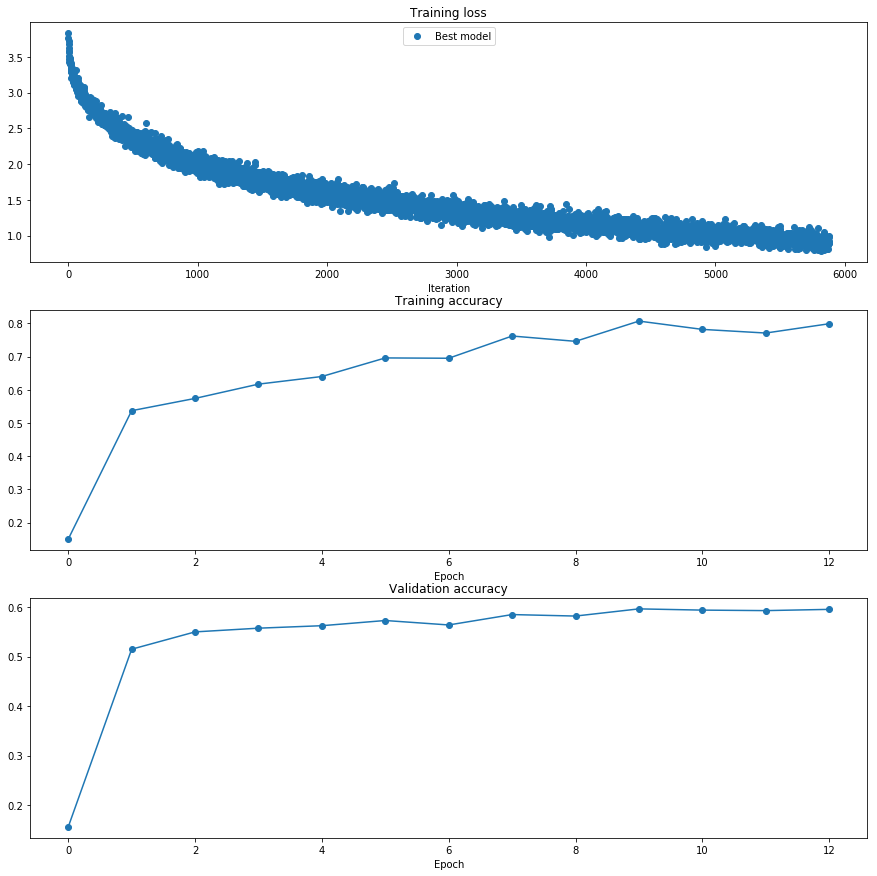

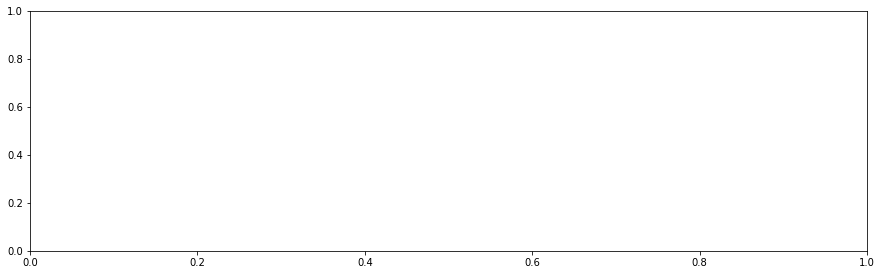

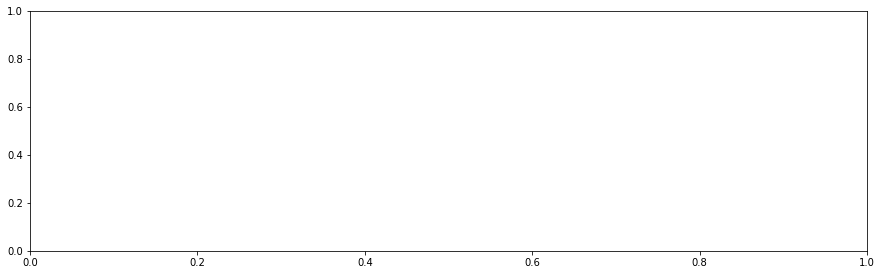

In [15]:
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(Trained.loss_history, 'o', label="Best model")

plt.subplot(3, 1, 2)
plt.plot(Trained.train_acc_history, '-o',label="Best model")

plt.subplot(3, 1, 3)
plt.plot(Trained.val_acc_history, '-o',label="Best model")

for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
    plt.gcf().set_size_inches(15, 15)
    plt.show()

In [16]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy ACCR: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.6125
Test set accuracy ACCR:  0.5879


In [17]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
CCRn = np.zeros(10)
for i in range(10):
        numCorrect = np.sum(y_test_pred[x] == Y_test[x] and y_test_pred[x] == i for x in range(X_test.shape[0]))
        CCRn[i] = float(numCorrect) / 1000
        print ('CCRn of %s is:  %f' % (classes[i], CCRn[i]))

CCRn of plane is:  0.629000
CCRn of car is:  0.692000
CCRn of bird is:  0.439000
CCRn of cat is:  0.416000
CCRn of deer is:  0.555000
CCRn of dog is:  0.475000
CCRn of frog is:  0.652000
CCRn of horse is:  0.636000
CCRn of ship is:  0.726000
CCRn of truck is:  0.659000
